In [147]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
import math
from numpy import mean

## Load and Plot the Data

In [148]:
#Load the experiment data files in python from the sensor

data_names = []


for i, name in enumerate(data_names):
    data[name] = np.loadtxt(experiment_path+data_files[i], dtype=float)

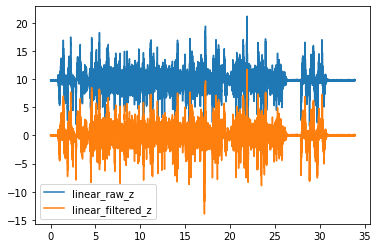

In [174]:
# z axis filtered & Raw data plot

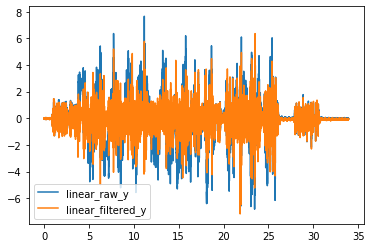

In [180]:
# Y axis filtered & Raw data plot

## Estimate the Parameters of the Model 

**so how does the model look like ?**

$\begin{bmatrix} U_x \\ U_y \\ U_z \end{bmatrix}^{measured} = \begin{bmatrix} {S_F + M_F} \end{bmatrix}\begin{bmatrix} a_x \\ a_y \\ a_z \end{bmatrix}^{actual/true} + \begin{bmatrix} b_x \\ b_y \\ b_z \end{bmatrix}^{bias} + \begin{bmatrix} \eta_x \\ \eta_y \\ \eta_z \end{bmatrix}^{random noises} $ 

\begin{equation} S_F = \begin{bmatrix} k_x & 0 & 0 \\ 0 & k_y & 0 \\ 0 & 0 & k_z \end{bmatrix}^{scale factor} \end{equation}

\begin{align*} M_F = \begin{bmatrix} 0 & m_{xy} & m_{xz} \\ m_{yx} & 0 & m_{yz} \\ m_{zx} & m_{zy} & 0 \end{bmatrix}^{misalignment} \end{align*}

\begin{equation} S_i = \frac{l_f^{up} - l_f^{down} - 2 * k}{2*k} \end{equation}

\begin{equation} b_i = \frac{l_f^{up} + l_f^{down}}{2} \\\ i = x,y,z \end{equation} 


**Least Square Method**



\begin{equation} y = mx + b \\ Y = XA + E  \end{equation} 
\begin{equation} Y = \begin{bmatrix} y_1  \\ y_2 \\ ... \\ y_n \end{bmatrix}^{ n x 1} \end{equation} 
\begin{equation} X = \begin{bmatrix} 1 & x_1  \\ 1 & x_2 \\ ... & ... \\ 1 & x_n \end{bmatrix}^{ n x 2} \end{equation} 
\begin{equation} A = \begin{bmatrix} b  \\ m  \end{bmatrix}^{ 2 x 1} \end{equation} 
\begin{equation} b = bias \\ m = scale factor  \end{equation} 

**Recurrsive Least Square**

$\begin{bmatrix} F_x & F_y & F_z \end{bmatrix}^{{T} \\ {True-value}}= \begin{bmatrix} A_F^S & A_F^M & -I_{[3x3]}\end{bmatrix}
\begin{bmatrix} s_F & m_F & B_F' \end{bmatrix}^{T} + \begin{equation} W_F \end{equation} $ 



In [196]:
Y = data['raw']
X = data['filtered']

# Genarating Xnew with 1 extra column in the beginning of the data

# Averaging to remove noises from the constant parameters

splits = 100

output_Y = np.array([sum(Y[i:i + splits])/splits
          for i in np.arange(0, len(Y), splits)])
output_X = np.array([sum(Xnew[i:i + splits])/splits
          for i in np.arange(0, len(Xnew), splits)])

A = Least square formula # Final Output (4x4)

# Linear data constant parameters
#first row - biasis
#diagnol of (3x3) is scalefactor and rest mis-alignment paramters for both the outputs

[[ 0.02441249  0.0894399   9.64741067]
 [ 1.63898618 -0.25330843  0.1218644 ]
 [-0.5902269   3.99519611 -0.08200026]
 [-0.22684954  0.01053475  1.01170445]]


In [197]:
# Angular data constant parameters

[[-0.1942373  -0.03724901  0.17303743]
 [-0.00499962  0.01161792  0.00146362]
 [-0.50124106  0.08312282 -0.06472488]
 [-0.27824921 -0.06844891  0.24411483]]


In [159]:
# Alan Variance Cluster Method Calculation

def function(n_samples, t0, T_min, T_max, clusters):
    if T_min is None:
        min_size = 1
    else:
        min_size = int(T_min / t0)

    if T_max is None:
        max_size = int(math.floor(n_samples / 2)) 
    else:
        max_size = int(T_max / t0)
        
    result = np.logspace(np.log2(min_size), np.log2(max_size), num=clusters, base=2)
    return np.unique(np.round(result)).astype(int)
    

/Users/salonishah/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/salonishah/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
No handles with labels found to put in legend.


0.00010349936363259395


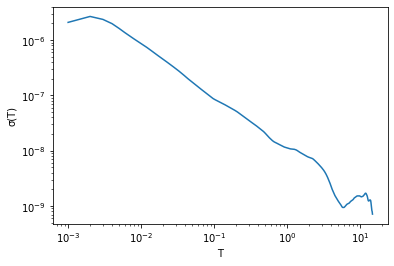

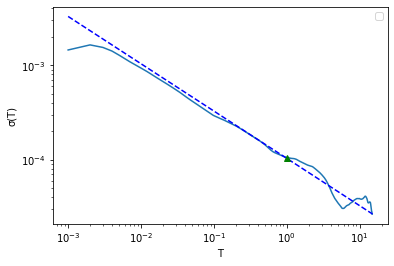

No handles with labels found to put in legend.


2.2370047369105116e-05


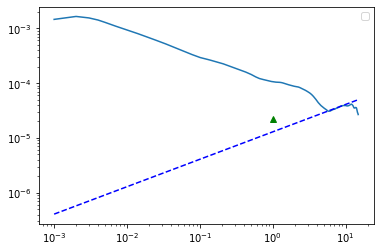

5.2674412721384115e-06
0.6644509157679996
5.866710414514631e-05


In [229]:
def al_var(x, dt=1, T_min=None, T_max=None,
                   clusters=1000, input_type='mean'):
    
    T = n*t0;

    
    x = np.asarray(x, dtype=float)
    if input_type == 'integral':
        X = x
    else:
        X = np.cumsum(x)
        
    cluster_sizes = function(len(x), t0, T_min, T_max, clusters)
      
    
    avar = np.empty(cluster_sizes.shape + X.shape[1:])
    for i, k in enumerate(cluster_sizes):
        c = X[2*k:] - 2 * X[k:-k] + X[:-2*k]
        avar[i] = np.mean(c**2, axis=0) / k / k

    if input_type == 'mean':
        avar *= 0.5
    else:
        avar *= 0.5 / t0**2
    
    
    
    return cluster_sizes * t0, avar

t0 = 1.e-3
x = data['angular_raw_stat'][:,1]  


T, av = al_var(x, t0, input_type='mean')

plt.figure("Allan Deviation")
plt.xlabel("T")
plt.ylabel("σ(T)")
plt.loglog(T, av)

adev = np.sqrt(av)
    
    
slope = -0.5
logT = np.log10(T)

logadev = np.log10(adev)
dlogadev = np.diff(logadev) / np.diff(logT)
    
    
a = (abs(dlogadev - slope).tolist())
index_min = a.index(min(a))

b = logadev[index_min] - slope*logT[index_min]
logN = slope*np.log10(1) + b


N = pow(10,logN)    
print(N)    # Angle Random Walk


TN = 1
lineN = np.divide(N, np.sqrt(T))


plt.loglog(T, adev) 
plt.loglog(T, lineN, 'b--')
plt.loglog(TN, N, 'g^')


    
# graph of K below B

print(K)    # Rate Random Walk    


print(R)    # Rate Ramp walk   

   
print(B)    # Bias Noise